<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from palmerpenguins import load_penguins

In [10]:
pip install palmerpenguins

In [11]:
penguins = load_penguins()
df = penguins.dropna()

In [12]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df['species'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

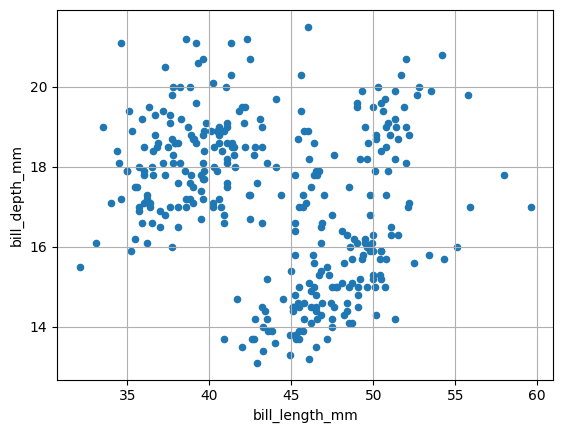

In [15]:
df.plot(kind='scatter', grid=True, x='bill_length_mm', y='bill_depth_mm')

In [16]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [17]:
X_new = [[50, 17, 400, 2000]]
print(model.predict(X_new))

['Adelie']


BINARY CLASSIFIER

In [18]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [19]:
df_binary = df[df['species'].isin(['Adelie', 'Gentoo'])]
X = df_binary[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df_binary['species'].values

In [20]:
y = (y == 'Gentoo').astype(int)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred_logreg = logreg.predict(X_test_scaled)

In [25]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")


Logistic Regression Accuracy: 100.00%


In [26]:
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [27]:
print(confusion_matrix(y_test, y_pred_logreg))

[[33  0]
 [ 0 20]]


In [28]:
from sklearn.svm import SVC


In [29]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [30]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [31]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 100.00%


In [32]:
print(confusion_matrix(y_test, y_pred_svm))

[[33  0]
 [ 0 20]]


In [33]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



Stochastic Gradient Descent and Softmax Regression


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [35]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

In [36]:
penguins = penguins.dropna()
X = penguins[['flipper_length_mm']].values
y = penguins[['body_mass_g']].values

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
n_epochs = 50
t0, t1 = 5, 50
m = X_b.shape[0]

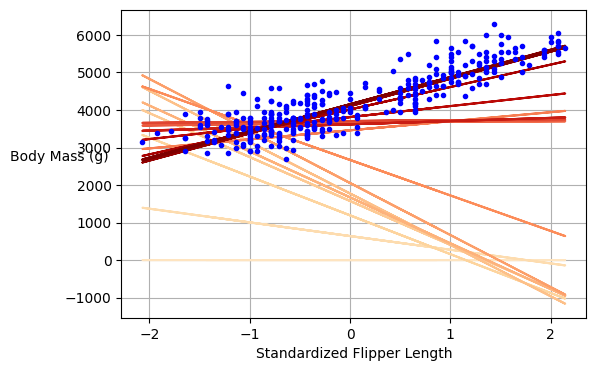

Final theta values: [[4209.10943512]
 [ 713.44295216]]


In [40]:
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

theta_path_sgd = []
n_shown = 20
plt.figure(figsize=(6, 4))

for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_b @ theta
            color = plt.cm.OrRd(iteration / n_shown + 0.15)
            plt.plot(X_scaled, y_predict, color=color)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

        theta_path_sgd.append(theta)

plt.plot(X_scaled, y, "b.")
plt.xlabel("Standardized Flipper Length")
plt.ylabel("Body Mass (g)", rotation=0)
plt.grid()
plt.show()

print("Final theta values:", theta)

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

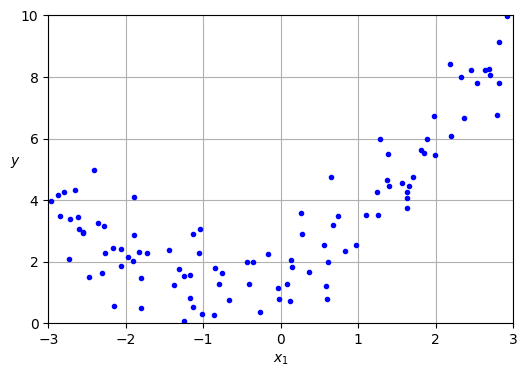

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from palmerpenguins import load_penguins

penguins = load_penguins()
df = penguins.dropna()

df['species'] = df['species'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes
df['island'] = df['island'].astype('category').cat.codes

X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island', 'sex']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-48-8a89c12da467>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].astype('category').cat.codes
<ipython-input-48-8a89c12da467>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].astype('category').cat.codes
<ipython-input-48-8a89c12da467>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [51]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_model.fit(X_train_scaled, y_train)

y_pred_softmax = softmax_model.predict(X_test_scaled)

print("Intercept:", softmax_model.intercept_)
print()
print("Coefficients:", softmax_model.coef_)


Intercept: [ 0.44545067 -0.24674788 -0.19870279]

Coefficients: [[-2.55862926  0.85868324 -0.52349815 -0.03538524  0.42771396  0.74149484]
 [ 2.11061998  0.47758795 -0.48768803 -0.91063918  0.35790219 -0.59123623]
 [ 0.44800928 -1.33627119  1.01118618  0.94602442 -0.78561616 -0.15025861]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


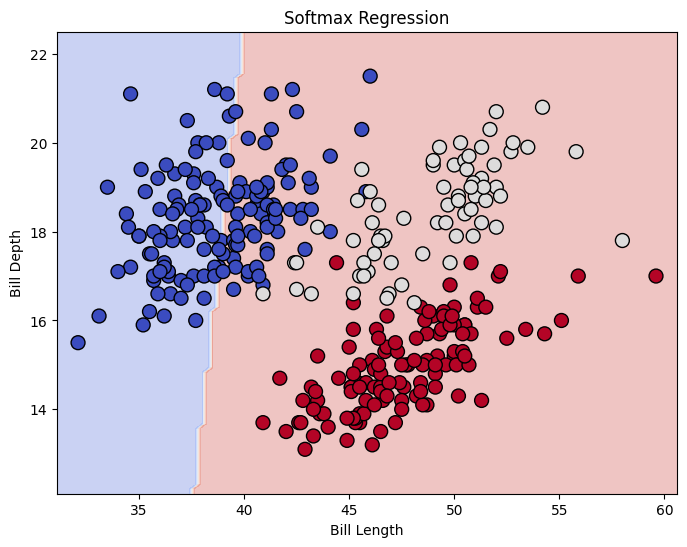

In [53]:
X_plot = df[['bill_length_mm', 'bill_depth_mm']].dropna()
y_plot = df['species'][X_plot.index]

x_min, x_max = X_plot['bill_length_mm'].min() - 1, X_plot['bill_length_mm'].max() + 1
y_min, y_max = X_plot['bill_depth_mm'].min() - 1, X_plot['bill_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(np.column_stack((grid, np.zeros((grid.shape[0], X.shape[1] - 2)))))  # Fill in zeros for other features
Z = softmax_model.predict(grid_scaled)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_plot['bill_length_mm'], X_plot['bill_depth_mm'], c=y_plot, edgecolors='k', cmap=plt.cm.coolwarm, s=100)
plt.xlabel("Bill Length")
plt.ylabel("Bill Depth")
plt.title("Softmax Regression")
plt.show()
